# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


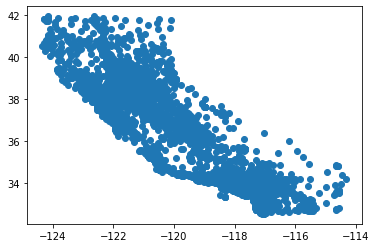

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


# KMeans Eğitmek

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as ss
import seaborn as sns
plt.style.use("ggplot")

Cluster sayısı 2'den 8'e kadar değişen durumlar için bir KMeans algoritması eğitmek ve veriyi bu durumlar için nasıl segmente ettiğini çizdirmek istiyorum. Bunun için bir for döngüsü başlatıp, enlem ve boylamları çizdirip, bölütlemeyi renkli ifade etmek için KMeans etiketlerini parametre olarak tanımlıyorum.

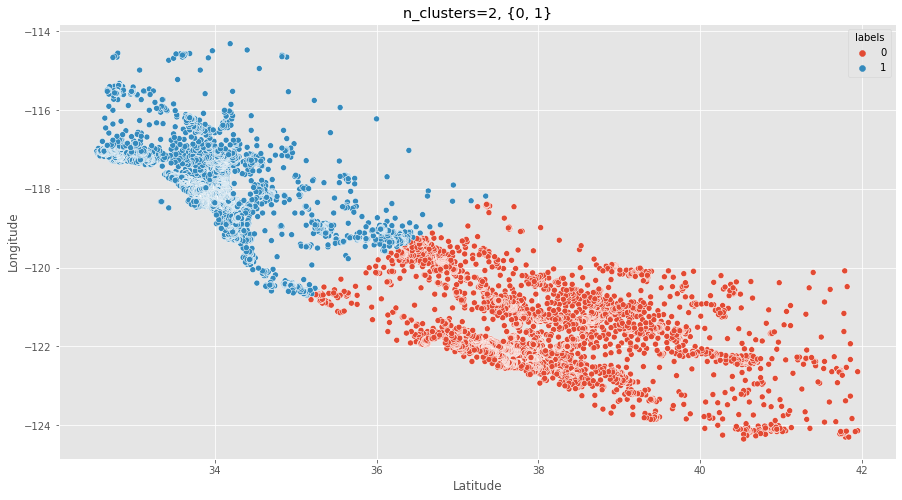

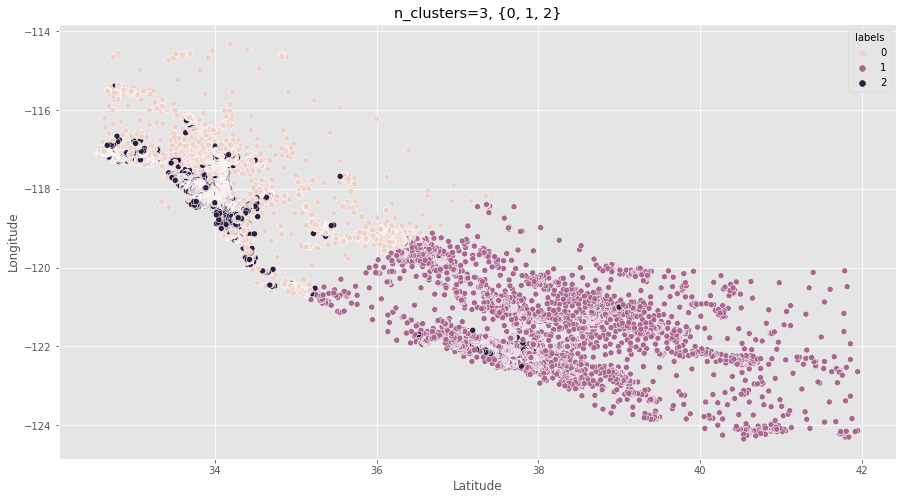

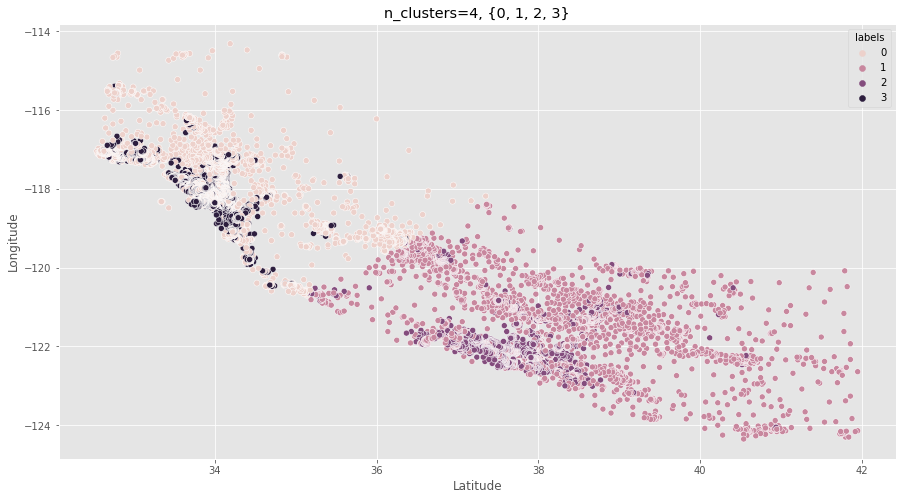

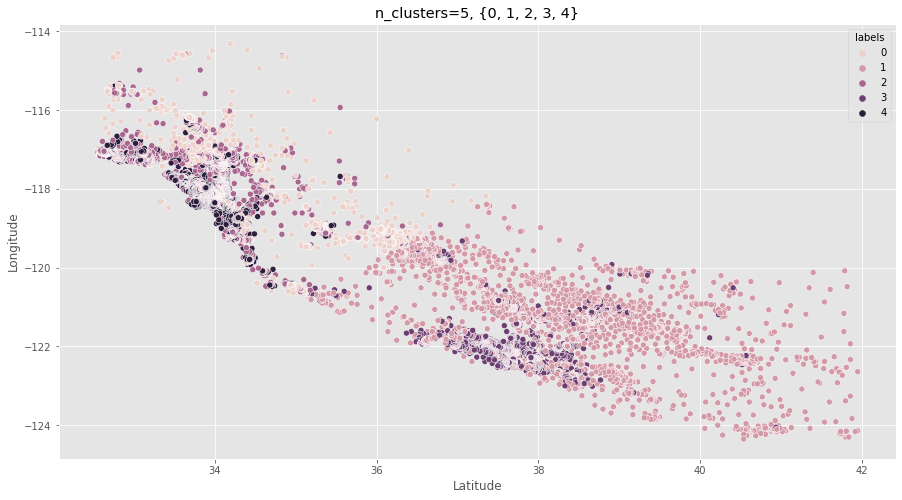

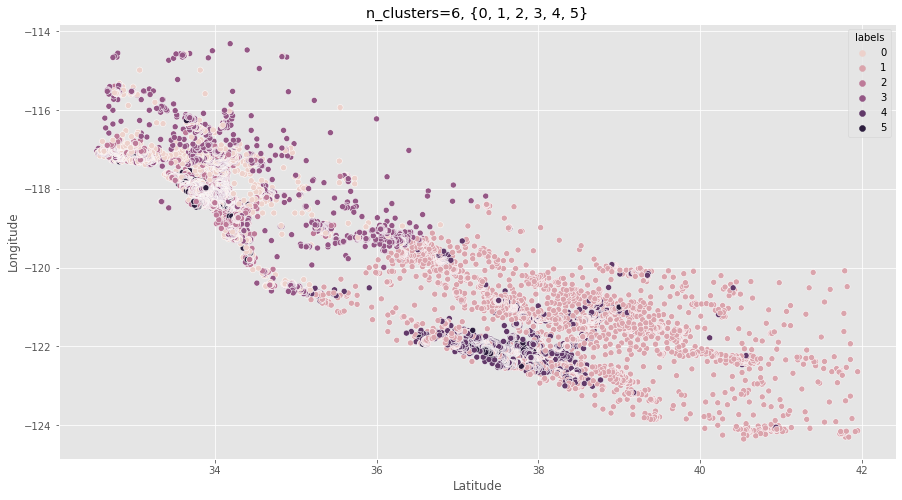

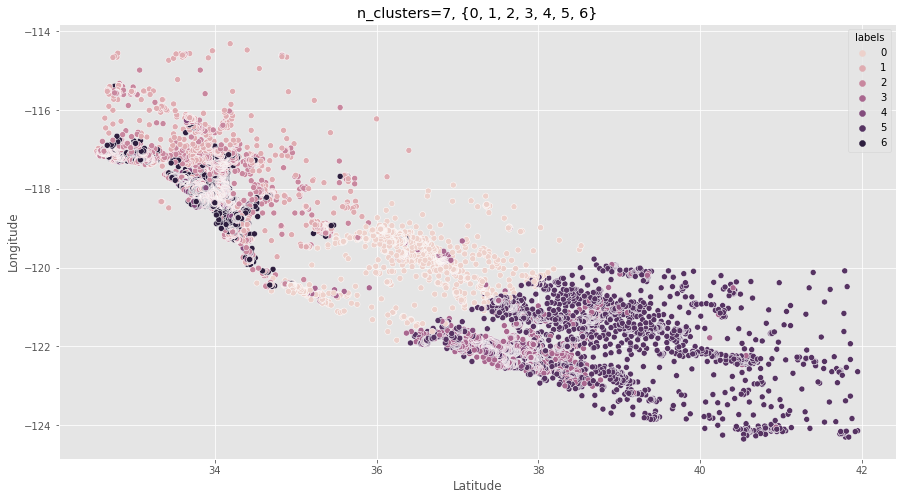

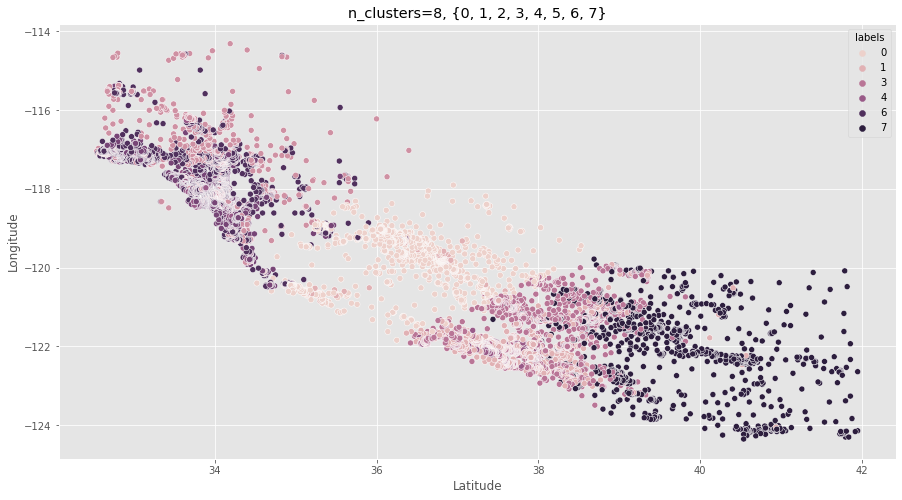

In [7]:
for n in range(7):
    kmeans = KMeans(n_clusters=n+2)
    labels = kmeans.fit_predict(X)
    X["labels"] = labels
    
    plt.figure(figsize=(15,8))
    plt.title(f"n_clusters={n+2}, {set(labels)}")
    sns.scatterplot(data=X, x="Latitude", y="Longitude", hue="labels")
    
plt.show()

## Silhouette Skoru

Silhouette skoru, bir problem için uygun olan küme sayısını belirlemek için kullanılan bir ölçüttür. Silhoutte skoru bulunurken, tüm örneklerin silhouette katsayısının ortalaması hesaplanır. Bir örneğe ait silhouette katsayısı ise:

(b-a) / max(a,b) şeklinde bulunur. Burada:
- a : Aynı kümedeki diğer örneklere olan uzaklıklarn ortalaması (küme içi ortalama uzaklık)
- b : En yakın diğer kümedeki elemanlara olan ortalama uzaklık

Silhouette skoru -1 ile +1 arasında değişkenlik gösterebilir. 1'e ne kadar yakınsa, örnekler o kadar iyi şekilde kendi clusterı içinde bulunur ve diğer clusterlardan uzaktır. 0'a yaklaştıkça, cluster sınırına yakındır ve -1'e yakın bir silhouette katsayısı, örneğin belkide yanlış clustera atanmış olduğu anlamına gelir.

Sklearn'de bu metriği kullanmak için metod içine verimizi ve unsupervised yöntemin belirlediği etiketleri vermemiz beklenir.

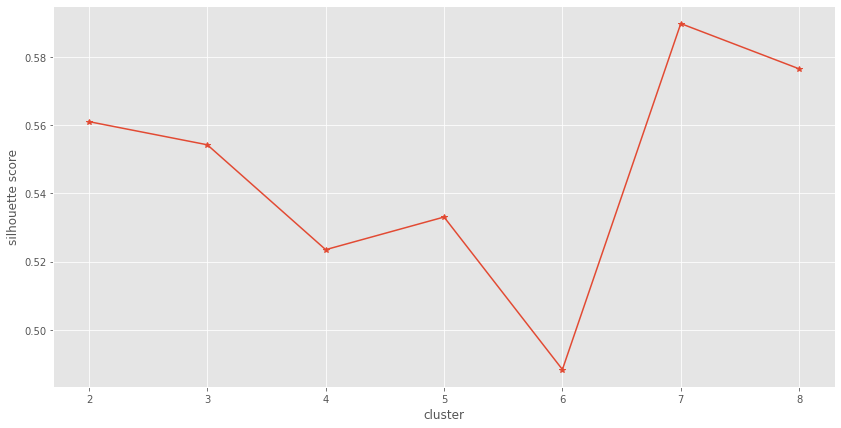

In [8]:
silhouette_scores = []

for n in range(7):
    kmeans = KMeans(n_clusters=n+2)
    labels = kmeans.fit_predict(X)
    X["labels"] = labels
    
    sscore = ss(X, labels)
    silhouette_scores.append(sscore)
    
plt.figure(figsize=(14,7))
plt.plot([2,3,4,5,6,7,8], silhouette_scores, "*-")
plt.xlabel('cluster')
plt.ylabel('silhouette score')
plt.show()